## Conventions 
$ \alpha_1 \rightarrow \texttt{alpha1},\quad 
\alpha_u \rightarrow \texttt{alpha_u},\quad 
\alpha_* \rightarrow \texttt{alpha_fp} $ <br>
$ \tilde{\alpha}_1 \rightarrow \texttt{Alpha1},\quad 
\tilde{\alpha}_u \rightarrow \texttt{Alpha_u},\quad 
\tilde{\alpha}_* \rightarrow \texttt{Alpha_fp} $ <br>

## Indices 
$$ \text{General index for coordinates in theory space:} \quad n = 1, \ldots, N; \quad \beta^n, g^n, \partial_n F, \partial_n \psi .$$ \
$$ \text{Index for coordinates on $S_{UV}$:} \quad \alpha = 1, \ldots, M=\text{dim}(S_{UV}); \quad \beta^{\alpha}, u^{\alpha} .$$ \
$$ \text{Index for coordinates that specify the embedding of $S_{UV}$ in $\mathbb{R}^N$:} \quad \mu = 1, \ldots, N-M; \quad \beta^{\mu}, v^{\mu}, F_{\mu}, M_{\mu}, p_{\mu} .$$ \
$$ \text{Index for the basis functions for the generating function and primary index for colocation points:} \quad i = 1, \ldots, N_p = \#\text{colocation points}; \quad \psi^i, p_i, g^{in}_{col} .$$ \
$$ \text{Secundary (Tertiary) index for colocation points:} \quad j,k = 1, \ldots, N_p = \#\text{colocation points}; \quad g^{jn}_{col}, g^{kn}_{\sim} .$$

## Objects
$$ \text{Coordinates in theory space:} \quad g^n \mapsto \{u^{\alpha}, v^{\mu} \}; \quad \text{N-dim. (0,1)-tensor} .$$ \
$$ \text{Beta functions:} \quad \beta^n: \mathbb{R}^N \mapsto \mathbb{R}^N; \quad \text{N-dim. (0,1)-tensor} .$$ \
$$ \text{Generating function:} \quad F_{\mu}: \mathbb{R}^N \mapsto \mathbb{R}^{N-M}; F_{\mu} = p_{i \mu} \psi^i \equiv (p\psi)_{\mu}; \quad \text{(N-M)-dim. (1,0)-tensor} .$$ \
$$ \text{Basis functions:} \quad \psi^i: \mathbb{R}^N \mapsto \mathbb{R}^{N_p}; \quad \text{$N_p$-dim. (0,1)-tensor} .$$ \
$$ \text{Free parameters:} \quad p_{i \mu}; \quad \text{($N_p \times$(N-M))-dim. (2,0)-tensor} .$$ \
$$ \text{Derivatives of generating function:} \quad (\partial F)_{n \mu} \equiv \partial_n F_{\mu}: \mathbb{R}^N \mapsto \mathbb{R}^N \times \mathbb{R}^{N-M}; \partial_n F_{\mu} = p_{i \mu}\partial_n \psi^i \equiv (p\partial \psi)_{n \mu}; \quad \text{(N$\times$(N-M))-dim. (2,0)-tensor} .$$ \
$$ \text{Derivatives of the basis functions:} \quad (\partial\psi)_n^i \equiv \partial_n \psi^i: \mathbb{R}^N \mapsto \mathbb{R}^N \times \mathbb{R}^{N_p}; \quad \text{(N$\times N_p$)-dim. (1,1)-tensor} .$$ \
$$ \text{Master equation:} \quad M_{\mu}: \mathbb{R}^N \mapsto \mathbb{R}^{N-M}; M_{\mu} = (\partial_n F_{\mu}) \beta^n = p_{i \mu} (\partial_n \psi^i) \beta^n; \quad \text{(N-M)-dim. (1,0)-tensor} .$$ \
$$ \text{Colocation points:} \quad g_{col}^{in}; \quad \text{($N_p\times$N)-dim. (0,2)-tensor} .$$ \
$$ \text{Most of these objects have a version specific at the fixed point, denoted by a * sub- or superscript} .$$ \
$$ \text{Alternatively, they might have a version specific to points around the fixed point, denoted by a $\sim$ sub- or superscript} .$$

In [1]:
## imports
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as rand
from itertools import product
from scipy.optimize import curve_fit

## setup
np.set_printoptions(linewidth=160)

ver = 0


Complexity of order O(Np^1.6)


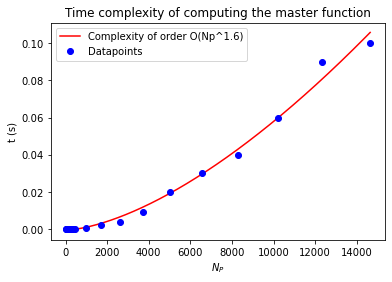

In [2]:
## Graphs from tests

# Runtime of master equation test data
def poly(x, a, b, c):
    return a*x**c+b
td_M = np.zeros((2,20))
td_M[0,:] = np.square(np.array([3,5,7,9,11,13,15,17,19,21,31,41,51,61,71,81,91,101,111,121]))
td_M[1,:] = np.array([1e-5,1e-5,2e-5,2e-5,3e-5,4e-5,5e-5,7e-5,9e-5,1e-4,4e-4,2e-3,4e-3,9e-3,2e-2,3e-2,4e-2,6e-2,9e-2,1e-1])
td_M_popt, td_M_pcov = curve_fit(poly, td_M[0,:], td_M[1,:])
print(f'Complexity of order O(Np^{np.round(td_M_popt[2],1)})')
td_M_x = np.linspace(td_M[0,0],td_M[0,-1],int(td_M[0,-1]-td_M[0,0]))
plt.figure()
plt.plot(td_M_x, poly(td_M_x, *td_M_popt), c='r', label=f'Complexity of order O(Np^{np.round(td_M_popt[2],1)})')
plt.plot(td_M[0],td_M[1],'o',c='b', label='Datapoints')
plt.xlabel(r'$N_P$')
plt.ylabel('t (s)')
plt.title('Time complexity of computing the master function')
plt.legend()
plt.show()

## Beta functions
$$ \beta^n: \mathbb{R}^N \mapsto \mathbb{R}^N, g^n = \begin{pmatrix} u^1 \\ \vdots \\ u^M \\ v^1 \\ \vdots \\ v^{N-M} \end{pmatrix} \mapsto \begin{pmatrix}  \beta^1(g^n) \\ \vdots \\ \beta^N(g^n) \end{pmatrix}  
\equiv \beta^n: \mathbb{R}^2 \mapsto \mathbb{R}^2, g^n= \begin{pmatrix} u \\ v \end{pmatrix} \mapsto \begin{pmatrix} u-\frac{u^6}{\pi^2 (u^2+v)^3} \\ -\frac{u^5}{6\pi^2 (u^2+v)^2} - \frac{2vu^5}{\pi^2(u^2+v)^3} \end{pmatrix}  $$

In [3]:
## beta functions
def beta(G): # G[j'th point, nth coord]
    u = G[:,0]
    v = G[:,1]
    if ver==1:
        beta_u = u - u**6 / (math.pi**2 * (u**2+v)**3)
        beta_v = -u**5 / (6*math.pi**2 * (u**2+v)**2) - 2*v*u**5 / (math.pi**2 * (u**2+v)**3)
        return np.array([beta_u, beta_v]) # beta[n] [!] this line is specifically 2D
    else:
        return np.array([2*u - 3*u**3 / (2*math.pi*(v + u)**3), -u**2*(7*v + u) / (4*math.pi*(v + u)**3)]) # beta[n] [!] this line is specifically 2D

## NGFP
$$ \beta^n(g^n_*) = 0 \implies \begin{pmatrix} u_* \\ v_* \end{pmatrix} = \begin{pmatrix} \frac{2197}{1728\pi^2} \\ -\frac{371293}{2985984\pi^4} \end{pmatrix} \implies F_{\mu}(g^n_*)=0 $$ 

In [4]:
## NGFP (beta functions = 0)
fp=0
target=0
if ver==1:
    fp = np.array([2197/(1728*math.pi**2), -371293/(2985984*math.pi**4)]) # fp[n] [!] this line is specifically 2D
    target = 4.8*10**-3
else:
    fp = np.array([343/(288*math.pi), -49/(288*math.pi)]) # fp[n] [!] this line is specifically 2D
    target = 0.15
N = fp.size
M = 1 # [!] this line is specifically 2D
print(fp)




[ 0.37909823 -0.05415689]


## Linear generating function and its derivatives
$$ F^*_{\mu}(g^n) = c_{n' \mu}\begin{pmatrix}g^n \\ 1\end{pmatrix}^{n'} =
\begin{pmatrix}
    c_{1,1} g^1 + c_{1,2} g^2 + \cdots + c_{1,N} g^N + c_{1,N+1} \\
    \vdots \\
    c_{N-M,1} g^1 + c_{N-M,2} g^2 + \cdots + c_{N-M,N} g^N + c_{N-M,N+1}
\end{pmatrix}^T
\equiv F^*(u,v) = -u + \frac{864(\sqrt{82}-11)\pi^2}{2197}v + \frac{169(15+\sqrt{82})}{3456\pi^2} $$ \
$$ \partial_n F^*_{\mu}(g^n) = (\partial F^*(g^n))_n = c_{n\mu} =
\begin{pmatrix}
    c_{1,1} & \cdots & c_{1,N-M} \\
    \vdots & & \vdots \\
    c_{N,1} & \cdots & c_{N,N-M}
\end{pmatrix}
\equiv (\nabla F^*(u,v))_n = \Bigg( -1 \quad \frac{864(\sqrt{82}-11)\pi^2}{2197} \Bigg) $$

In [5]:
## linear generating function and its derivative
c_fp=0
if ver==1:
    c_fp = np.array([
        [-1], 
        [864*(82**0.5-11)*math.pi**2/2197], 
        [169*(15+82**0.5)/(3456*math.pi**2)]
    ]) # N+1 x N-M coefficients c_fp[n',mu] [!] this line is specifically 2D
else:
    c_fp = np.array([
        [172 - 137*43**0.5], 
        [215 + 44*43**0.5], 
        [49*(1003*43**0.5 - 989)/(288*math.pi)]
    ]) # N+1 x N-M coefficients c_fp[n',mu] [!] this line is specifically 2D

def F_fp(g): # Calculate c_fp[n',mu]*g[n'] (n' means (gn, 1))
    return np.matmul(np.append(g,[1]),c_fp) # F_fp [!] this line is specifically 2D

def dF_fp(): # Return dF_fp
    return np.array([c_fp[:-1,:]]) # dF_fp[nth derivative] [!] this line is specifically 2D

linear_v = -c_fp[-1,0]/c_fp[-2,0] # [!] this line is specifically 2D
print(f'Linear v = {linear_v}')


Linear v = -0.6010293960725723


## Colocation points

In [6]:
## generate grid of colocation points

N_cp_g = 17 # Number of colocation points in each direction g^n
N_cp = N_cp_g**N # Number of colocation points

# Search space above and below fp for each direction g^n; cp_bound[nth direction, 0=lower 1=upper]
cp_bound = np.abs(np.array([[0.5,0.5], [0.5,0.5]]))

sigma = np.mean(cp_bound)*2/N_cp_g # smoothness factor for basis functions

print(sigma)

cps = np.array([np.linspace(
    fp[n]-cp_bound[n,0], 
    fp[n]+cp_bound[n,1], 
    N_cp_g) for n in range(0,fp.size)]) # linspaces that span space of colocation points
gg = np.array(np.meshgrid(*cps,indexing='ij')) # gg[n,n_cp_g1,...,n_cp_gn]

def idToCoord(cp):
    # maps a 1D array of collocation point ids [0, ..., N_cp_g-1] to the coordinates on the grid
    coords = np.zeros((cp.size, N))
    for d in (range(1,N+1)):
        D = N-d
        coords[:,D] = cp - np.mod(cp, np.ones(cp.size)*N_cp_g**D)
        if D != N-1:
            for dd in range(D+1,N):
                coords[:,D] -= coords[:,dd]*N_cp_g**dd
        coords[:,D] = np.divide(coords[:,D], np.ones(cp.size)*N_cp_g**D)
        coords = coords.astype(int)
    return np.array([gg[:,coords[:,0],coords[:,1]][:,i] for i in range(0, cp.size)]) # idToCoord[ith cp, nth coord] [!] this line is specifically 2D

CP = idToCoord(np.array(list(range(0,N_cp)))) # CP[ith cp, nth coord]


0.058823529411764705


## Basis functions (Multivariate Cauchy Distributions)
$$ g^{ni}_{col} = (g^{in}_{col})^T $$ \
$$ \psi^i(g^n) = \Bigg( 1 + \sum^N_n\frac{(g^n-g^{ni}_{col})^2}{\sigma^2} \Bigg)^{-1} $$ \
$$ \partial_n\psi^i(g^n) = (\partial\psi(g^n))_n^i = -\frac{2}{\sigma^2}(g^n-g^{ni}_{col})\psi^i(g^n)^2 $$

In [7]:
## Basis functions and their derivatives

CP_transpose = CP.transpose() # CP_transpose[nth coord,ith cp]

def psi(G): # G[j'th point, nth coord]
    # divide(1, (1 + 1/sigma**2 * matmul(1, square([g,...,g]^T - CP^T)))) for all g in G
    return np.array([np.divide(np.ones(N_cp),(np.ones(N_cp) + (1/sigma**2)*np.matmul(np.ones(N),np.square(np.tile(g,(N_cp,1)).transpose() - CP_transpose)))) for g in G]) # psi[jth point,ith function]

def dpsi(G): # G[j'th point, nth coord]
    # multiply(-2/sigma**2 * ([g,...,g]^T - CP^T) for all g in G, (tile(square(psi(CP)),(N,1,1)), axes=[1,0,2])^T)
    return np.multiply(np.array([((-2/sigma**2) * (np.tile(g,(N_cp,1)).transpose() - CP_transpose)) for g in G]), np.transpose(np.tile(np.square(psi(CP)),(N,1,1)), axes=[1,0,2])) # dpsi[jth point, nth derivative,ith function]


## Pre-calculate

In [8]:
## Precaluculate up until now
pc_F_fp = np.array([F_fp(cp) for cp in CP]) # [jth point, function mu]
print(f'F:{pc_F_fp.shape}')
pc_dF_fp = dF_fp() # [function mu, nth derivative]
print(f'dF:{pc_dF_fp.shape}')
pc_psi = psi(CP) # [jth point,ith function]
print(f'psi:{pc_psi.shape}')
pc_dpsi = dpsi(CP) # [jth point, nth derivative,ith function]
print(f'dpsi:{pc_dpsi.shape}')
p = np.ones((N_cp,M)) # p[ith basis function, function mu]
print(f'p:{p.shape}')
pc_beta = beta(CP) #
print(f'beta:{pc_beta.shape}')

F:(289, 1)
dF:(1, 2, 1)
psi:(289, 289)
dpsi:(289, 2, 289)
p:(289, 1)
beta:(2, 289)


## Fixed parameters
$$ \partial_n F_{\mu} \big|_{g^n_*} = \partial_n F^*_{\mu} \implies F_{\mu} \big|_{g_{\sim}^n} \approx F^*_{\mu} \big|_{g_{\sim}^n} $$ \
$$ \text{For one these $g_{\sim}^n$ : } p_{i \mu}\psi^i(g_{\sim}^n) \approx F^*_{\mu}(g_{\sim}^n) \implies p_{1\mu} \approx \frac{1}{\psi^1(g_{\sim}^n)}\bigg[ F^*_{\mu}(g_{\sim}^n) - \sum_{i=2}^{N_p} p_{i \mu}\psi^i(g_{\sim}^n) \bigg] $$ \
$$ \text{For $K$ of these $g^{kn}_{\sim}$ : } $$ \
$$ g^{1n}_{\sim}: \quad p_{1\mu} \approx \frac{1}{\psi^1(g^{1n}_{\sim})}\bigg[ F^*_{\mu}(g^{1n}_{\sim}) - \sum_{i=2}^{N_p} p_{i \mu}\psi^i(g^{1n}_{\sim}) \bigg] $$ \
$$ g^{2n}_{\sim}: \quad p_{2\mu} \approx \frac{1}{\psi^2(g^{2n}_{\sim})}\bigg[ F^*_{\mu}(g^{2n}_{\sim}) - p_{1\mu}\psi^1(g^{2n}_{\sim}) - \sum_{i=3}^{N_p} p_{i \mu}\psi^i(g^{2n}_{\sim}) \bigg] $$ \
$$ \vdots $$ \
$$ g^{Kn}_{\sim}: \quad p_{K\mu} \approx \frac{1}{\psi^K(g^{Kn}_{\sim})}\bigg[ F^*_{\mu}(g^{Kn}_{\sim}) - \sum_{k=1}^{K-1}p_{k\mu}\psi^k(g^{Kn}_{\sim}) - \sum_{i=K+1}^{N_p} p_{i \mu}\psi^i(g^{Kn}_{\sim}) \bigg] $$ \
$$ \text{This fixes $K \times (N-M)$ parameters $p_{i\mu}$} .$$

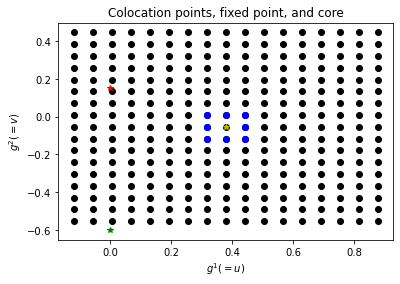

In [9]:
## Find the values for the fixed p's
p = np.ones((N_cp,M)) # reset

# Find the id's of the 8 points directly around the fp
def findCoreIds(): # Find the id's of the 3^N-1 points directly around the fp
    perms = np.array([i for i in product([-1,0,1], repeat=N)])
    perms = np.delete(perms, int((perms.shape[0]-1)/2), 0)
    ids = np.zeros(3**N-1)
    for i in range(0,perms.shape[0]):
        for j in range(0, perms.shape[1]):
            ids[i] += N_cp_g**j*((N_cp_g-1)/2 + perms[i,j])
    return ids.astype('int') # findCoreIds[k'th core point]

def findFpId():
    ids = 0
    for j in range(0, N):
        ids += N_cp_g**j*(N_cp_g-1)/2
    return int(ids)

fp_id = findFpId()

core_ids = findCoreIds()
core_coords = idToCoord(core_ids)

# plot colocation points and core
if N == 2:
    fig_grid = plt.figure()
    ax_grid = fig_grid.add_subplot()
    plt.plot(gg[0], gg[1], marker='o', color='k', linestyle='none')
    plt.plot(fp[0], fp[1], marker='*', color='y')
    plt.plot(0, target, marker='*', color='r')
    plt.plot(0, linear_v, marker='*', color='g')
    plt.plot(core_coords[:,0], core_coords[:,1], marker='o', color='b', linestyle='none')
    #ax_grid.set_aspect('equal', adjustable='box')
    plt.xlabel(r'$g^1 (= u)$')
    plt.ylabel(r'$g^2 (= v)$')
    plt.title('Colocation points, fixed point, and core')
    plt.show()
    
def findFixedParameters(p): # current parameters p
    pc = np.copy(p)
    a = core_ids[0]
    for k in range(0,core_ids.size):
        kd = core_ids[k]
        pc[k,:] = 1/pc_psi[kd,k] * np.subtract(pc_F_fp[kd], np.add(np.matmul(pc_psi[kd,0:k], pc[0:k,:]), np.matmul(pc_psi[kd,k+1:], pc[k+1:,:])))
    return pc # p[ith basis function, function mu]
    
p = findFixedParameters(p)
# print(p[0:3**N-1])
# plt.figure()
# plt.plot(p[:,0]/max(p[:,0]))
# plt.show

## Generating function
$$ F_{\mu}(g^n) = p_{i \mu} \psi^i(g^n) $$

In [10]:
## Generating function

def F(p): # p[ith function, function mu]
    val = np.matmul(pc_psi, p) # (j,i)x(i,mu)=(j,mu)
    return np.subtract(val, np.matmul(psi(np.array([fp])), p)[0,0]) # F[j'th point, function mu] [!] this line is specifically 2D

def F_general(G, p): # G[point, nth coord] p[ith function, function mu]
    val = np.matmul(psi(G), p)
    return np.subtract(val, np.matmul(psi(np.array([fp])), p)[0,0]) # F[j'th point, function mu] [!] this line is specifically 2D

def findSolutionV2D(bound, number):
    check_coords = np.zeros((number,2))
    check_coords[:,1] = np.linspace(fp[1]-bound[1,0], fp[1]+bound[1,1], number)
    check_F = np.square(F_general(check_coords,p))
    return check_coords[np.argmin(check_F[:,0]),1]

print(f'F at fp = {F_general(np.array([fp]),p)}')
print(findSolutionV2D(cp_bound, 100000))

print(F(p).shape)    
# sns.heatmap(np.array([[F(p)[i+N_cp_g*j,0] for i in range(0,N_cp_g)] for j in range(0,N_cp_g)])) 

F at fp = [[0.]]
-0.08988224761123137
(289, 1)


## Master equation
$$ M_{\mu}^j \equiv M_{\mu}(g_{col}^{jn}) = \big(p_{i\mu}\partial_n\psi^i(g_{col}^{jn})\big)\beta^n(g_{col}^{jn}) \equiv (p\partial\psi)_{\mu n}^j (\beta)^{jn} \equiv (p\partial\psi\beta)^j_{\mu} $$ 

In [11]:
## Master equation
def ME(p):
    return np.sum(np.square(np.trace(np.matmul(pc_beta, np.transpose(np.matmul(pc_dpsi, p), axes=[2,0,1])), axis1=1, axis2=2)))

print(ME(p))

# Time recording of master function
if(False):
    N_test = 1000
    cum_time = 0
    for i in range(0,N_test):
        start = time.time()
        v = ME(p)
        end = time.time()
        cum_time += end-start
    print("{:e}".format(cum_time/N_test))



290548820674599.25


## Genetic algorithm

In [12]:
a = np.array(range(1,7))
a.shape = (3,2)
print(a)
a.shape = (6)
print(a)
a.shape = (3,2)
print(a)

[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]


In [16]:
## tune p s.t. all master equations go to 0

def fixParametersForPop(pop):
    return np.array([findFixedParameters(p) for p in pop])

def shuffleAlongAxis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

def blendBiasedCrossover(q1, q2, P):
    for i in range(0, q1.size):
        if rand.random() < P:
            x1 = min([q1[i],q2[i]])
            x2 = max([q1[i],q2[i]])
            l = x1 - rand.random()*(x2-x1)
            r = x2 + rand.random()*(x2-x1)
            q1[i] = rand.uniform(l,r)
            q2[i] = rand.uniform(l,r)
    return q1, q2
            
def shapeIndividuals(q1, q2):
    o_shape = q1.shape
    q1.shape = o_shape[0]*o_shape[1]
    q2.shape = o_shape[0]*o_shape[1]
    return q1, q2, o_shape

def reshapeIndividuals(q1, q2, o_shape):
    q1.shape = o_shape
    q2.shape = o_shape
    return q1, q2

def gausssianMutation(q, P, score, gausssian_mutation_divider):
    gauss = np.random.normal(0, score/10, q.shape)
    mask = np.random.choice([0, 1], size=q.size, p=[1-P,P])
    return np.add(q,np.multiply(gauss, mask))

def message(interval, counter, check1, check2, scores, bound_ratio):
    if counter % interval == 0:
        print('')
        print(f'= Generation {counter} =')
        print(f'Failsaves: {check1}, {check2}.')
        print(f'Current best and worst scores: [{np.format_float_scientific(min(scores),2)},...,{np.format_float_scientific(max(scores),2)}].')
        print(f'v={np.format_float_scientific(findSolutionV2D(bound_ratio*cp_bound, 10000),2)}')
    

v_track = []

# population size should always be even to have crossover work
pop_size = 40*N_cp
keep_percent = 0.3
keep_number = int(pop_size*keep_percent/2)*2
cross_chance = 0.03
mut_chance = 1/(10*N_cp)
gausssian_mutation_divider = 10

# initilize population
pop = np.random.rand(pop_size, N_cp, M)*2-1
pop = fixParametersForPop(pop)
pop = np.array([p/max(p) for p in pop])

# fitness function
def fitness(pop):
    return np.array([ME(p) for p in pop])

scores = fitness(pop)
print(scores)

counter = 1
max_iter = 100000

# starting message
print('= Starting Genetic Algorithm =')
print(f'Keep {keep_number} out of {pop_size} individuals.')
print(f'Crossover {cross_chance*100}% of pairs.')

while min(scores) > 10**-40 and counter < max_iter:
    # precompute some values
    weights = np.max(scores) - scores
    m = np.min(scores)
    
    # selection
    pop = pop[scores.argsort()[::-1]] # sorts in descending order of scores i.e. best is at bottom of pop
    scores = scores[scores.argsort()[::-1]]
    pop[:-keep_number] = np.array(rand.choices(pop[keep_number:], weights=weights[keep_number:], k=pop_size-keep_number))
       
    # mutation
    for i in range(2,pop_size,2):
        q1, q2, o_shape = shapeIndividuals(pop[i,1:].copy(), pop[i+1,1:].copy())
        q1 = gausssianMutation(q1, mut_chance, scores[i], gausssian_mutation_divider)
        q2 = gausssianMutation(q2, mut_chance, scores[i+1], gausssian_mutation_divider)
        pop[i,1:], pop[i+1,1:] = reshapeIndividuals(q1, q2, o_shape)
        
    # shuffle
    pop = shuffleAlongAxis(pop, 0)
    
    # crossover
    for i in range(0,pop_size,2):
        q1, q2, o_shape = shapeIndividuals(pop[i,1:].copy(), pop[i+1,1:].copy())
        q1, q2 = blendBiasedCrossover(q1,q2,cross_chance)
        pop[i,1:], pop[i+1,1:] = reshapeIndividuals(q1, q2, o_shape)
        
    
    # score each individual in the generation
    scores = fitness(pop)
    message(10, counter, m > 10**-40, counter < max_iter, scores, 1/2)

    if(True):
        p = pop[np.argmin(scores)]
        v_track.append(findSolutionV2D(cp_bound/2, 10000))
        
    counter += 1

print('')
print(f'= End at generation {counter} =')
print(f'{min(scores) > 0.01}, {counter < max_iter}')
scores = fitness(pop)
print(min(scores))
p = pop[np.argmin(scores)]
print(f'v={np.format_float_scientific(findSolutionV2D(cp_bound/2, 10000),2)}')

    

[4654381.761011   2753544.97561308 3465156.1250777  ... 3325312.71249635 1297459.85060915 2111347.1272369 ]
= Starting Genetic Algorithm =
Keep 3468 out of 11560 individuals.
Crossover 3.0% of pairs.

= Generation 10 =
Failsaves: True, True.
Current best and worst scores: [5.06e-04,...,1.12e+174].
v=1.96e-01

= Generation 20 =
Failsaves: True, True.
Current best and worst scores: [9.76e-05,...,2.01e+86].
v=1.42e-01

= Generation 30 =
Failsaves: True, True.
Current best and worst scores: [2.18e-05,...,3.79e+118].
v=1.96e-01

= Generation 40 =
Failsaves: True, True.
Current best and worst scores: [2.01e-04,...,7.23e+83].
v=9.58e-02

= Generation 50 =
Failsaves: True, True.
Current best and worst scores: [1.08e-05,...,6.35e+73].
v=1.27e-01

= Generation 60 =
Failsaves: True, True.
Current best and worst scores: [9.51e-04,...,1.54e+133].
v=5.60e-02

= Generation 70 =
Failsaves: True, True.
Current best and worst scores: [1.03e-05,...,9.5e+70].
v=1.96e-01

= Generation 80 =
Failsaves: True,

KeyboardInterrupt: 

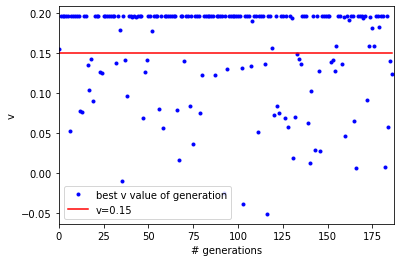

v=0.15115885398273265


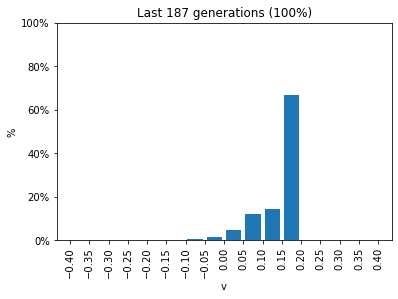

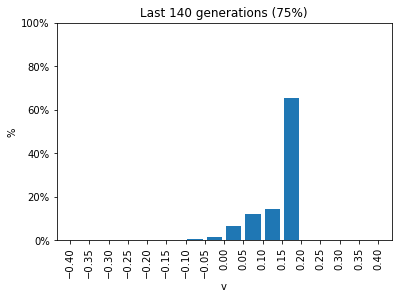

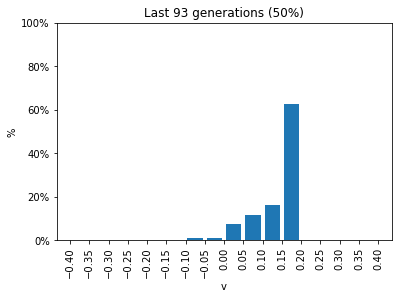

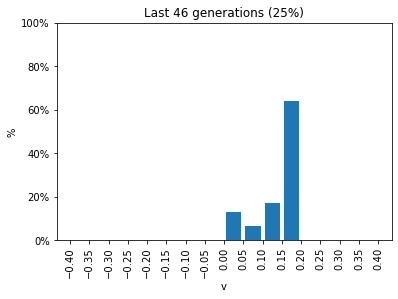

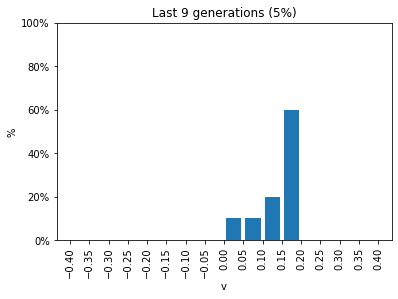

In [17]:
from matplotlib.ticker import PercentFormatter

v_track = np.array(v_track)
plt.figure()
plt.plot(v_track,'.',c='b',label='best v value of generation')
plt.plot(v_track*0+target,c='r',label=(f'v={target}'))
#plt.plot(v_track*0+target+cp_bound[0,1],c='y',label=('bound'))
#plt.plot(v_track*0+target-cp_bound[0,0],c='y')
plt.xlim(0,v_track.size)
plt.xlabel('# generations')
plt.ylabel('v')
plt.legend()
plt.show()
print(f'v={np.mean(v_track[int(0.75*v_track.size):])}')



plt.figure()
plt.hist(v_track, weights=np.ones(len(v_track)) / len(v_track), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {v_track.size} generations (100%)')
plt.show()

plt.figure()
plt.hist(v_track[int(0.25*v_track.size):], weights=np.ones(len(v_track[int(0.25*v_track.size):])) / len(v_track[int(0.25*v_track.size):]), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {int(0.75*v_track.size):} generations (75%)')
plt.show()

plt.figure()
plt.hist(v_track[int(0.5*v_track.size):], weights=np.ones(len(v_track[int(0.5*v_track.size):])) / len(v_track[int(0.5*v_track.size):]), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {int(0.5*v_track.size):} generations (50%)')
plt.show()

plt.figure()
plt.hist(v_track[int(0.75*v_track.size):], weights=np.ones(len(v_track[int(0.75*v_track.size):])) / len(v_track[int(0.75*v_track.size):]), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {int(0.25*v_track.size):} generations (25%)')
plt.show()

plt.figure()
plt.hist(v_track[int(0.95*v_track.size):], weights=np.ones(len(v_track[int(0.95*v_track.size):])) / len(v_track[int(0.95*v_track.size):]), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {int(0.05*v_track.size):} generations (5%)')
plt.show()

In [15]:
# 15x15 cp, offset 4 no lm_reduce, done in 948 gen., vals [0, 0.2]
# 15x15 cp, offset 4 with lm_reduce, done in 306 gen., vals [-0.1, 0.2]
# 15x15 cp, offset 3 no lm_reduce, done in 198 gen., vals [-0.1, 0.2]

# bounds to 3/4bound --> homes in on -0.064